In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

In [2]:
# To plot pretty figures directly within Jupyter
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [3]:
# Code example
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

In [4]:
#문자열로 이루어진 배열을 숫자 배열로 바꿈 AD = 1, MCI = 2, CN = 3

def change_str_to_int(arr):
    import numpy as np
    arr_idx = np.zeros(shape=len(arr))
    idx = 0
    for i in arr:
        if i == "AD":
            arr_idx[idx]=1
        elif i == "MCI":
            arr_idx[idx]=2
        elif i == "CN":
            arr_idx[idx]=3
        idx+=1
    return arr_idx

In [5]:
# Load the data
data = pd.read_csv("D:\가톨릭대학교\\AIMed\\인공지능 경험랩\\data\\adni-fs.csv")

TA = data.filter(regex="TA$")

data_extracted= pd.merge(left=data[['diagnosis']], right=TA, left_index=True, right_index=True)

data_extracted = data_extracted.dropna()


In [7]:
data_shuffled =sklearn.utils.shuffle(data_extracted)

In [8]:
df_shuffled = data_extracted.iloc[np.random.permutation(len(data_extracted))].reset_index(drop=True)

In [43]:
# Prepare the data

X= df_shuffled.filter(regex="TA$").values
#X = data_extracted['ST13TA'].values
y = df_shuffled['diagnosis'].values
y_idx = change_str_to_int(y)

In [15]:
# Prepare the data

X= data_shuffled.filter(regex="TA$").values
#X = data_extracted['ST13TA'].values
y = data_shuffled['diagnosis'].values
y_idx = change_str_to_int(y)

In [6]:

# Prepare the data

X = data_extracted.filter(regex="TA$").values
#X = data_extracted['ST13TA'].values
y = data_extracted['diagnosis'].values
y_idx = change_str_to_int(y)

'    \nplt.scatter(X,y)\n'

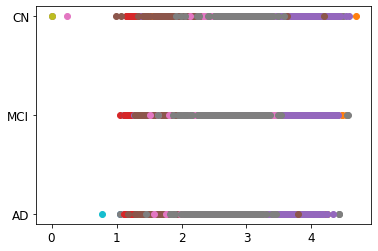

In [7]:
# Visualize the data

for i in range(68):
    T = X[:,i]
    plt.scatter(T,y)
'''    
plt.scatter(X,y)
'''

In [8]:
# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y_idx)

LinearRegression()

In [9]:
X_train, X_test, y_train, y_test = X[:1400], X[1400:],y_idx[:1400],y_idx[1400:]

In [10]:
y_train_AD = (y_train == 1)
y_test_AD = (y_test == 1)
y_train_MCI = (y_train == 2)
y_test_MCI = (y_test == 2)
y_train_CN = (y_train == 3)
y_test_CN = (y_test == 3)

In [11]:
from sklearn.linear_model import SGDClassifier
sgd_clf_AD = SGDClassifier(max_iter=1000000,tol=1e-3,random_state=100)
sgd_clf_AD.fit(X_train,y_train_AD)

SGDClassifier(max_iter=1000000, random_state=100)

In [12]:
model = sklearn.linear_model.LinearRegression()

In [13]:
model.fit(X_train, y_train)

LinearRegression()

In [14]:
sgd_clf_AD.predict([X[0]])

array([ True])

In [15]:
y[0]

'AD'

In [17]:
model.predict([X[0]])

array([1.18472337])

In [18]:
#cross validation
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
skfolds = StratifiedKFold(n_splits=3)

for train_index, test_index in skfolds.split(X_train, y_train_AD):
  clone_clf = clone(sgd_clf_AD)
  X_train_folds = X_train[train_index]
  y_train_folds = y_train_AD[train_index]
  X_test_fold = X_train[test_index]
  y_test_fold = y_train_AD[test_index]

  clone_clf.fit(X_train_folds, y_train_folds)
  y_pred = clone_clf.predict(X_test_fold)
  n_correct = sum(y_pred == y_test_fold)
  print(n_correct / len(y_pred))

0.7987152034261242
0.8372591006423983
0.4699570815450644


In [19]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf_AD, X_train, y_train_AD,cv=3,scoring="accuracy")

array([0.7987152 , 0.8372591 , 0.46995708])

In [20]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X_train, y_train_AD,cv =3)

array([0.1073219 , 0.19956341, 0.19026746])

In [21]:
print(y)

['AD' 'MCI' 'CN' ... 'CN' 'CN' 'CN']


In [22]:
sgd_clf_AD.predict([X[0]])

array([ True])

In [23]:
# confusion matrix

from sklearn.model_selection import  cross_val_predict

y_train_pred_AD = cross_val_predict(sgd_clf_AD, X_train, y_train_AD, cv = 3)

y_train_pred_AD

array([ True, False, False, ..., False,  True,  True])

In [24]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_AD, y_train_pred_AD)

#row = 실제 class, column = 예측한 class

# TN FP
# FN TP


# Recall : AD라고 예측한 데이터들 중 실제 AD인 데이터 확률 (TP / TP + FN)
# Precision : 실제 AD인 데이터들 중 예측값도 AD인 데이터 확률 (TP / TP +  FP)



array([[862, 288],
       [129, 121]], dtype=int64)

In [25]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_AD, y_train_pred_AD)

0.29584352078239606

In [26]:
recall_score(y_train_AD,y_train_pred_AD)

0.484

In [27]:
from sklearn.metrics import f1_score

f1_score(y_train_AD, y_train_pred_AD)

0.36722306525037934

In [28]:
y_scores_AD = sgd_clf_AD.decision_function([X[0]])
y_scores_AD

array([20.57433859])

In [29]:
threshold_AD= 0
y_some_X_pred_AD = (y_scores_AD > threshold_AD)
y_some_X_pred_AD

array([ True])

In [58]:
threshold_AD= -54
y_some_X_pred_AD = (y_scores_AD > threshold_AD)
y_some_X_pred_AD

array([ True])

In [30]:
y_scores_AD = cross_val_predict(sgd_clf_AD, X_train, y_train_AD, cv = 3, method = "decision_function")

#precision_recall_curve() 모든 thereshold에 대한 precision과 recall변화 추이 알 수 있다.

In [31]:
from sklearn.metrics import precision_recall_curve

precisions_AD, recalls_AD, thresholds_AD = precision_recall_curve(y_train_AD, y_scores_AD)

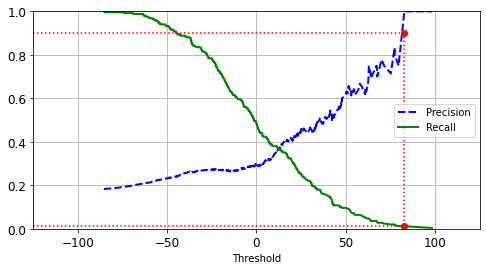

In [32]:
precisions_AD, recalls_AD, thresholds_AD = precision_recall_curve(y_train_AD, y_scores_AD)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=10) # Not shown in the book
    plt.xlabel("Threshold", fontsize=10)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-125, 125, 0, 1])             # Not shown



recall_90_precision_AD = recalls_AD[np.argmax(precisions_AD >= 0.90)]
threshold_90_precision_AD = thresholds_AD[np.argmax(precisions_AD >= 0.90)]


plt.figure(figsize=(8, 4))                                                                  # Not shown
plot_precision_recall_vs_threshold(precisions_AD, recalls_AD, thresholds_AD)
plt.plot([threshold_90_precision_AD, threshold_90_precision_AD], [0., 0.9], "r:")                 # Not shown
plt.plot([-125, threshold_90_precision_AD], [0.9, 0.9], "r:")                                # Not shown
plt.plot([-125, threshold_90_precision_AD], [recall_90_precision_AD, recall_90_precision_AD], "r:")# Not shown
plt.plot([threshold_90_precision_AD], [0.9], "ro")                                             # Not shown
plt.plot([threshold_90_precision_AD], [recall_90_precision_AD], "ro")                             # Not shown                   
plt.show()

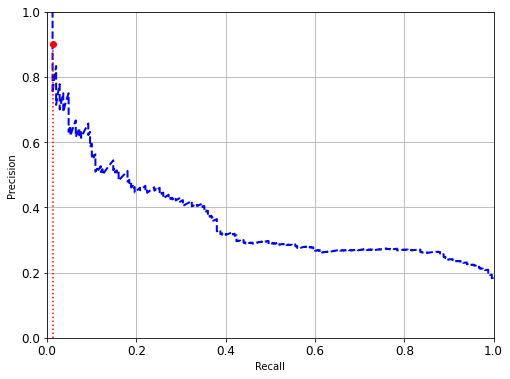

In [33]:
def plot_recall_vs_precisons(precisions, recalls):
    plt.plot(recalls[:-1], precisions[:-1], "b--", linewidth=2)
    plt.xlabel("Recall", fontsize=10)
    plt.ylabel("Precision", fontsize=10)
    plt.grid(True)
    plt.axis([0, 1, 0, 1])
    
recall_90_precision_AD = recalls_AD[np.argmax(precisions_AD >= 0.90)]

plt.figure(figsize=(8, 6)) 
plot_recall_vs_precisons(precisions_AD, recalls_AD)
plt.plot([recall_90_precision_AD, recall_90_precision_AD], [0., 0.9], "r:") 

plt.plot([recall_90_precision_AD], [0.9], "ro") 
plt.show()

In [34]:
threshold_90_precision = thresholds_AD[np.argmax(precisions_AD >= 0.90)]

In [35]:
y_train_pred_90 = (y_scores_AD >= threshold_90_precision)

In [36]:
precision_score(y_train_AD, y_train_pred_90)

1.0

In [37]:
recall_score(y_train_AD, y_train_pred_90) #그냥 전체 다 AD라고 예측,,,,,,,,? ㅜ..

0.012

In [38]:
# ROC Curve

from sklearn.metrics import roc_curve

fpr_AD, tpr_AD, thresholds_AD = roc_curve(y_train_AD, y_scores_AD)

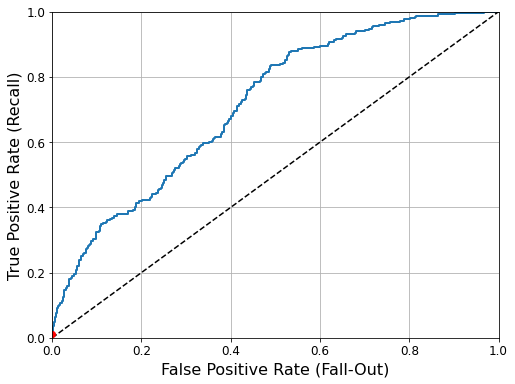

In [39]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                         # Not shown
plot_roc_curve(fpr_AD, tpr_AD)
fpr_90 = fpr_AD[np.argmax(tpr_AD >= recall_90_precision_AD)]
plt.plot([fpr_90, fpr_90], [ 0. , recall_90_precision_AD], "r:")
plt.plot([0.0, fpr_90], [recall_90_precision_AD, recall_90_precision_AD], "r:")
plt.plot([fpr_90], [recall_90_precision_AD], "ro")
plt.show()


In [40]:
# Area Under Curve (AUC) : compare classifiers

from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_AD, y_scores_AD)

0.7152904347826087

In [41]:
# RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier

forest_clf_AD = RandomForestClassifier(random_state = 42)
y_probas_forest_AD = cross_val_predict(forest_clf_AD, X_train, y_train_AD, cv=3, method = "predict_proba")

In [42]:
y_scores_forest_AD = y_probas_forest_AD[:, 1] # score = proba of positive class
fpr_forest_AD, tpr_forest_AD, thresholds_forest_AD = roc_curve(y_train_AD, y_scores_forest_AD)

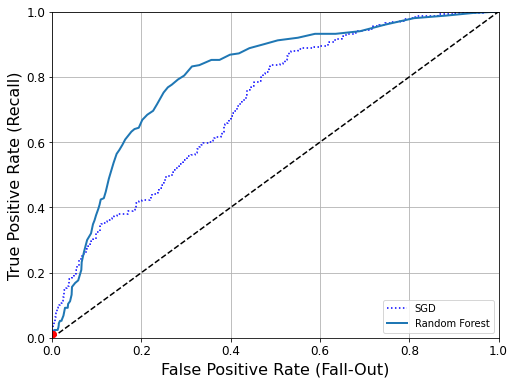

In [43]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_AD, tpr_AD, "b:", label ="SGD")
plot_roc_curve(fpr_forest_AD, tpr_forest_AD,"Random Forest")
plt.legend(loc="lower right")

fpr_90 = fpr_AD[np.argmax(tpr_AD >= recall_90_precision_AD)]
plt.plot([fpr_90, fpr_90], [ 0. , recall_90_precision_AD], "r:")
plt.plot([0.0, fpr_90], [recall_90_precision_AD, recall_90_precision_AD], "r:")
plt.plot([fpr_90], [recall_90_precision_AD], "ro")

fpr_90_forest = fpr_forest_AD[np.argmax(tpr_forest_AD >= recall_90_precision_AD)]
plt.plot([fpr_90_forest, fpr_90_forest], [ 0. , recall_90_precision_AD], "r:")
plt.plot([0.0, fpr_90_forest], [recall_90_precision_AD, recall_90_precision_AD], "r:")
plt.plot([fpr_90_forest], [recall_90_precision_AD], "ro")

plt.show()

In [44]:
roc_auc_score(y_train_AD, y_scores_forest_AD)

0.7998556521739131

In [45]:
# Multi-Class Classification

from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train, y_train)
svm_clf.predict([X[0]])

array([1.])

In [46]:
some_dig_scores = svm_clf.decision_function([X[0]])
some_dig_scores

array([[ 2.24230429,  1.17155159, -0.26274512]])

In [50]:
np.argmax(some_dig_scores)

0

In [49]:
svm_clf.classes_

array([1., 2., 3.])

In [51]:
svm_clf.classes_[0]

1.0

In [96]:
y[223]

'MCI'

In [67]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train, y_train)
ovr_clf.predict([X[9]])

array([2.])

In [71]:
len(ovr_clf.estimators_)

3

In [97]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(max_iter=1000000,tol=1e-3,random_state=100)
sgd_clf.fit(X_train,y_train)
sgd_clf.predict([X[223]])

array([1.])

In [98]:
sgd_clf.decision_function([X[223]])

array([[ -0.63377941, -17.82232717, -52.4581651 ]])

In [95]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.48608137, 0.52034261, 0.5193133 ])

In [99]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")


array([0.43683084, 0.49892934, 0.50429185])

In [106]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[105, 127,  18],
       [133, 433, 198],
       [ 13, 239, 134]], dtype=int64)

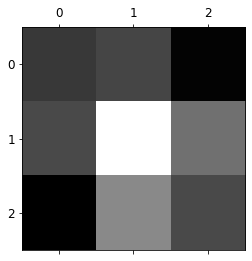

In [107]:
plt.matshow(conf_mx, cmap = plt.cm.gray)
plt.show()

In [108]:
y_train_pred_1 = cross_val_predict(sgd_clf, X_train, y_train, cv=3)
conf_mx_1 = confusion_matrix(y_train, y_train_pred_1)
conf_mx_1

array([[ 46, 186,  18],
       [ 47, 532, 185],
       [  5, 247, 134]], dtype=int64)

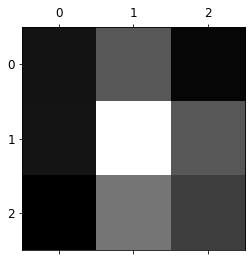

In [109]:
plt.matshow(conf_mx_1, cmap = plt.cm.gray)
plt.show()

In [110]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

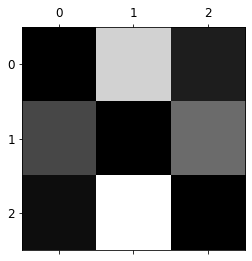

In [111]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()